# Residual Network
As deeper networks always outperforms the less deeper ones, residual networks are highly deep neural networks.
With a residual block, however, a skip function reduces the number of times a linear function is used to achieve an output. A skip function creates what is known as a residual block.

As per what we have seen so far, increasing the depth should increase the accuracy of the network, as long as over-fitting is taken care of. But the problem with increased depth is that the signal required to change the weights, which arises from the end of the network by comparing ground-truth and prediction becomes very small at the earlier layers, because of increased depth. It essentially means that earlier layers are almost negligible learned. This is called vanishing gradient. The second problem with training the deeper networks is, performing the optimization on huge parameter space and therefore naively adding the layers leading to higher training error. Residual networks allow training of such deep networks by constructing the network through modules called residual models as shown in the figure. This is called degradation problem. The intuition around why it works can be seen as follows:

### tflearn
TFlearn is a modular and transparent deep learning library built on top of Tensorflow. It was designed to provide a higher-level API to TensorFlow in order to facilitate and speed-up experimentations, while remaining fully transparent and compatible with it.

TFLearn features include:

Easy-to-use and understand high-level API for implementing deep neural networks, with tutorial and examples.
Fast prototyping through highly modular built-in neural network layers, regularizers, optimizers, metrics...
Full transparency over Tensorflow. All functions are built over tensors and can be used independently of TFLearn.
Powerful helper functions to train any TensorFlow graph, with support of multiple inputs, outputs and optimizers.
Easy and beautiful graph visualization, with details about weights, gradients, activations and more...
Effortless device placement for using multiple CPU/GPU.

In [1]:
Installing tflearn

!pip install tflearn

  Stored in directory: C:\Users\ritua\AppData\Local\pip\Cache\wheels\d0\f6\69\0ef3ee395aac2e5d15d89efd29a9a216f3c27767b43b72c006
Successfully built tflearn


In [3]:
# Importing necessary libraries
import tflearn
import numpy as np
from numpy import genfromtxt
from tflearn.data_preprocessing import ImagePreprocessing
import pandas as pd

In [4]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import cv2
import os, shutil
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [5]:
#GPU Configuration

config = tf.ConfigProto( device_count = {'GPU': 1,'CPU':56} ) #Allow TensorFlow to use your GPU, GPU = 0 will only make use of the CPU
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

In [6]:
n = 5
df = pd.read_csv("fer2013.csv")
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [7]:
num_classes=7

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
import keras

In [10]:
# Count number of samples and sample size 

with open("C:/Info6105FacialExpressionDetectionComputerVision/Facial_Expression_Recognition/fer2013.csv") as f:
    content = f.readlines()

lines = np.array(content)

num_of_instances = lines.size
print("number of instances: ",num_of_instances)
print("instance length: ",len(lines[1].split(",")[1].split(" ")))

number of instances:  35888
instance length:  2304


In [11]:
#Initialize train, test and validation set

x_train, y_train, x_test, y_test, x_val, y_val = [], [], [], [], [], []

In [12]:
#Transfer data into these sets

for i in range(1,num_of_instances):
    emotion, img, usage = lines[i].split(",")
          
    val = img.split(" ")
            
    pixels = np.array(val, 'float32')
        
    emotion = keras.utils.to_categorical(emotion, num_classes)
    
    if 'Training' in usage:
        y_train.append(emotion)
        x_train.append(pixels)
    elif 'PublicTest' in usage:
        y_test.append(emotion)
        x_test.append(pixels)
    elif 'PrivateTest' in usage:
        y_val.append(emotion)
        x_val.append(pixels)
#     except:
#         print("",end="")

In [16]:
#Data transformation for train, test and validation sets

x_train = np.asarray(x_train, 'float32')
y_train = np.asarray(y_train, 'float32')
x_test = np.asarray(x_test, 'float32')
y_test = np.asarray(y_test, 'float32')
x_val = np.asarray(x_val, 'float32')
y_val = np.asarray(y_val, 'float32')

#normalize inputs between [0, 1]

x_train /= 255 
x_val /= 255
x_test /= 255

x_train = x_train.reshape(x_train.shape[0], 48, 48, 1)
x_train = x_train.astype('float32')
x_val = x_val.reshape(x_val.shape[0], 48, 48, 1)
x_val = x_val.astype('float32')
x_test = x_test.reshape(x_test.shape[0], 48, 48, 1)
x_test = x_test.astype('float32')

#Count the number of samples in each set

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_val.shape[0], 'validaiton samples')

28709 train samples
3589 test samples
3589 validaiton samples


In [17]:
x_train = x_train.reshape([-1, 48, 48, 1])
x_test = x_test.reshape([-1, 48, 48, 1])
x_val=x_val.reshape([-1, 48, 48, 1])

In [18]:
# Real-time preprocessing of the image data
img_prep = ImagePreprocessing()
img_prep.add_featurewise_zero_center()
img_prep.add_featurewise_stdnorm()

In [19]:
# Real-time data augmentation
img_aug = tflearn.ImageAugmentation()
img_aug.add_random_flip_leftright()

In [20]:
    # Building Residual Network
    
#net = tflearn.residual_block(net, n, 16)
#net = tflearn.residual_block(incoming, nb_blocks, out_channels)
#incoming-incoming: Tensor. Incoming 4-D Layer.
# nb_blocks: int. Number of layer blocks.
# out_channels: int. The number of convolutional filters of the convolution layers.



net = tflearn.input_data(shape=[None, 48, 48, 1], data_preprocessing=img_prep, data_augmentation=img_aug)
net = tflearn.conv_2d(net, nb_filter=16, filter_size=3, regularizer='L2', weight_decay=0.0001)
net = tflearn.residual_block(net, n, 16)
net = tflearn.residual_block(net, 1, 32, downsample=True)
net = tflearn.residual_block(net, n-1, 32)
net = tflearn.residual_block(net, 1, 64, downsample=True)
net = tflearn.residual_block(net, n-1, 64)
net = tflearn.batch_normalization(net)
net = tflearn.activation(net, 'relu')
net = tflearn.global_avg_pool(net)

Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.


In [21]:
# Regression
net = tflearn.fully_connected(net, 7, activation='softmax')
mom = tflearn.Momentum(learning_rate=0.1, lr_decay=0.0001, decay_step=32000, staircase=True, momentum=0.9)
net = tflearn.regression(net, optimizer=mom,loss='categorical_crossentropy')

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [22]:
  # Training
model = tflearn.DNN(net, checkpoint_path='models/model_resnet_emotion',
                    max_checkpoints=20, tensorboard_verbose=0,
                    clip_gradients=0.)

Instructions for updating:
Use tf.cast instead.


In [23]:
# fitting the model
model.fit(x_train, y_train, n_epoch=100, snapshot_epoch=False, snapshot_step=500,
          show_metric=True, batch_size=128, shuffle=True, run_id='resnet_emotion')

Training Step: 22499  | total loss: 0.22575 | time: 1111.959s
| Momentum | epoch: 100 | loss: 0.22575 - acc: 0.9162 -- iter: 28672/28709
Training Step: 22500  | total loss: 0.23065 | time: 1116.928s
| Momentum | epoch: 100 | loss: 0.23065 - acc: 0.9160 -- iter: 28709/28709
--


In [25]:
# Evaluating the score of the model
score=model.evaluate(x_test,y_test)

In [26]:
# Printing the test accuracy
print('Test_accuracy',score)

Test_accuracy [0.5781554750668435]


In [27]:
# saving the model
model.save('resnet.tfl')

In [28]:
# Evaluating and plotting the emotions in a bar graph
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()

In [29]:
import matplotlib.pyplot as plt

C:\Users\ritua\Anaconda37\lib\site-packages\keras_preprocessing\image\utils.py:98: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


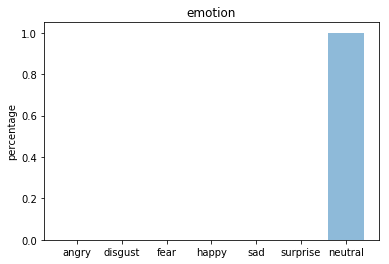

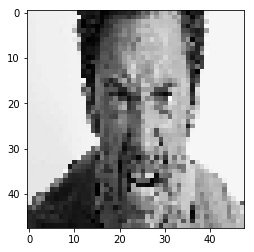

In [30]:
img = image.load_img("angryface.jpg", grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)

x = x.flatten()
x = x.reshape([-1, 48, 48, 1])

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(x)
plt.show()

# Conclusion:
#### The accuracy we have got in this model are:
    Training Accuracy-0.9160
    Testing Accuracy-0.5781554750668435
    
 Resnet have the concept of residual blocks which helps in resolving the degradation problem as we increase the number of layers in the neural net.
 Here, we see that there is overfitting problem as the there is vast difference between training and testing accuracy.


# Contribution
In the above analysis:

60% of the work is done by us which includes

VGG19 and ResNet implementation
CNN accuracy improvement
Live webcam code optimization
40% of the work is taken from web

# Citations
For face detection - https://www.youtube.com/watch?v=PmZ29Vta7Vc

VGG19 using tflearn - https://www.mathworks.com/help/deeplearning/ref/vgg19.html;jsessionid=ccf9599bd865b423281a56299a68

For VGG19 and ResNet - https://github.com/tflearn/tflearn/tree/master/examples/images

For tflearn - http://tflearn.org/tutorials/

Facial Emotion Recognition using CNN - http://sefiks.com/2018/01/01/facial-expression-recognition-with-keras/

# License
MIT License

Copyright (c) 2019 Ritu Agrawal, Nikhil Kashid

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.